## XGBOOST MODEL

In [1]:
pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/150.0 MB 3.4 MB/s eta 0:00:45
   ---------------------------------------- 1.6/150.0 MB 3.6 MB/s eta 0:00:41
    --------------------------------------- 2.9/150.0 MB 4.5 MB/s eta 0:00:33
   - -------------------------------------- 4.5/150.0 MB 5.4 MB/s eta 0:00:28
   - -------------------------------------- 5.8/150.0 MB 5.7 MB/s eta 0:00:26
   - -------------------------------------- 7.1/150.0 MB 5.8 MB/s eta 0:00:25
   -- ------------------------------------- 8.7/150.0 MB 5.8 MB/s eta 0:00:25
   -- ------------------------------------- 10.5/150.0 MB 6.2 MB/s eta 0:00:23
   --- ------------------------------------ 12.1/150.0 MB 6.4 MB/s eta 0:00:22
   --- ------------------------------------ 13.6/150.0 MB 6.5 MB/s eta 0:00:22
   ---- ----------------------------------- 15.5/150.0 MB 6.6 MB/s eta 0:00:21
   ---- ----------------------------------- 16.5/150.0 MB 6.5 MB/s 

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import xgboost as xgb

In [6]:
# gradient boosting algorithm, often used in competitions
# it handles missing data, categorical features (after encoding)
# prevents overfitting
# feature importance helps interpret which variable are more influential in predictions
# of the target variable

In [10]:
data = fetch_openml(name = 'mushroom', version = 1, as_frame = True)
df = data.frame

In [12]:
df.head()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e


In [14]:
df.columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises%3F', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat', 'class'],
      dtype='object')

In [16]:
df['class'].value_counts()

class
e    4208
p    3916
Name: count, dtype: int64

In [22]:
df.dtypes

cap-shape                   category
cap-surface                 category
cap-color                   category
bruises%3F                  category
odor                        category
gill-attachment             category
gill-spacing                category
gill-size                   category
gill-color                  category
stalk-shape                 category
stalk-root                  category
stalk-surface-above-ring    category
stalk-surface-below-ring    category
stalk-color-above-ring      category
stalk-color-below-ring      category
veil-type                   category
veil-color                  category
ring-number                 category
ring-type                   category
spore-print-color           category
population                  category
habitat                     category
class                       category
dtype: object

In [24]:
y = df['class'].astype('category').cat.codes
y.head()

0    1
1    0
2    0
3    1
4    0
dtype: int8

In [26]:
df['class'].head()

0    p
1    e
2    e
3    p
4    e
Name: class, dtype: category
Categories (2, object): ['e', 'p']

In [28]:
X = df.drop('class', axis = 1).apply(lambda col: col.astype('category').cat.codes)
X.head()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [30]:
df['bruises%3F'].value_counts()

bruises%3F
f    4748
t    3376
Name: count, dtype: int64

In [32]:
df['odor'].value_counts()

odor
n    3528
f    2160
s     576
y     576
a     400
l     400
p     256
c     192
m      36
Name: count, dtype: int64

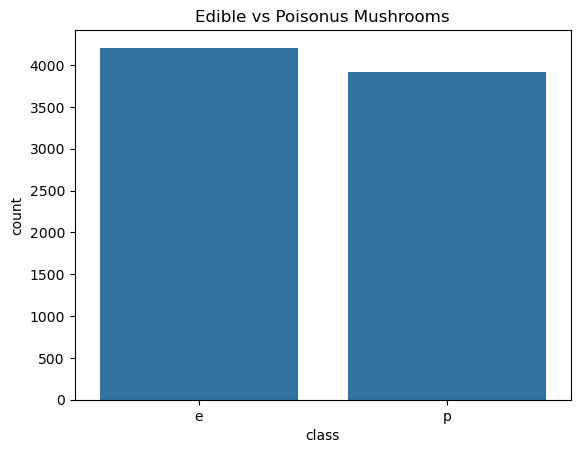

In [34]:
# Visualize class balance
sns.countplot(x = 'class', data = df)
plt.title("Edible vs Poisonus Mushrooms")
plt.show()

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [40]:
xgb_model = xgb.XGBClassifier(use_label_encoder = False, eval_metric = 'logloss', random_state = 42)
xgb_model.fit(X_train, y_train)

C:\Users\User\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:15:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [42]:
y_pred = xgb_model.predict(X_test)

In [48]:
y_test.head(10)

1971    0
6654    1
5606    1
3332    0
6988    1
5761    1
5798    1
3064    1
1811    0
3422    0
dtype: int8

In [52]:
y_pred

array([0, 1, 1, ..., 1, 1, 1])

In [54]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0

In [56]:
confusionmatrix = confusion_matrix(y_test, y_pred)
confusionmatrix

array([[843,   0],
       [  0, 782]], dtype=int64)

In [64]:
print('Classification Report:\n', classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



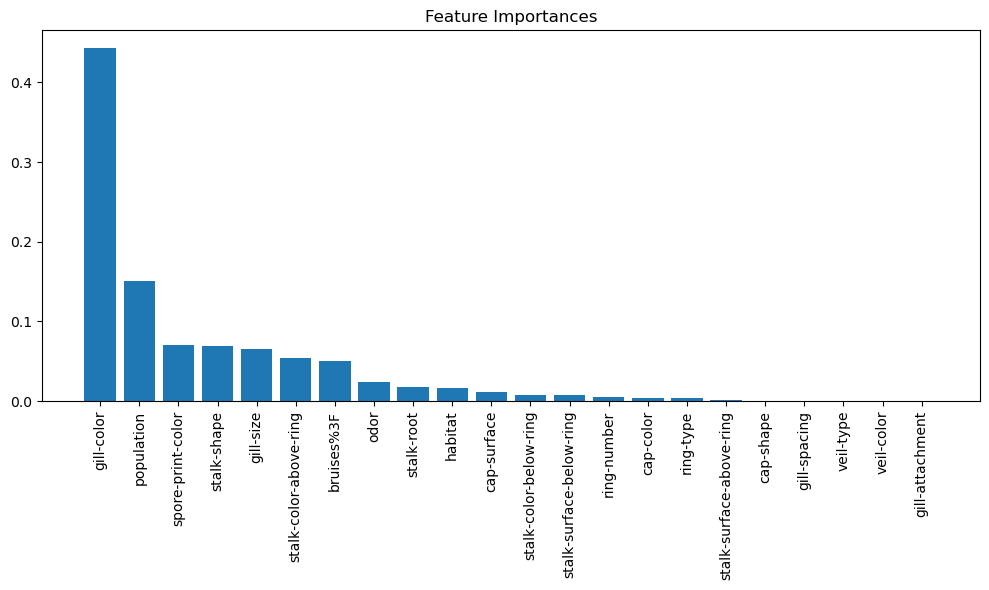

In [70]:
importances = xgb_model.feature_importances_
indices = importances.argsort()[::-1]
features = X.columns
plt.figure(figsize = (10,6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align = 'center')
plt.xticks(range(X.shape[1]), features[indices], rotation = 90)
plt.tight_layout()
plt.show()